<a href="https://colab.research.google.com/github/Lipun101/Wine_Prediction_Model/blob/main/wine_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction Model**

**A wine dataset! This dataframe contains physico-chemical characteristics of wines, which can be used to predict the quality of wine.**

**This data frame contains the following columns:**

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

**Import Libraries**

In [ ]:
# Adding the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Reading the Data set and extracting the basic details out of it**

In [ ]:
# Reading the data set

data = pd.read_csv('/content/drive/MyDrive/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# data1 = pd.read_csv('/content/drive/MyDrive/WineQT.csv')

In [ ]:
# Checking out the number of rows and coluumns.
print('Shape of the datset is :------------------------->')
data.shape

Shape of the datset is :------------------------->


(1143, 13)

In [ ]:
# Checking for the basic informations

print('Brief information regarding the data : ------------------------>\n')
data.info()
print('----------------------------------------------------------------')

Brief information regarding the data : ------------------------>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
---------

In [ ]:
# checking out the null values in the datset
print("Displaying columns which have null values in them : ---------------------->\n")
data.isnull().sum()

# There are no Null Values over here

Displaying columns which have null values in them : ---------------------->



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
# Statistical Summary of the data set
print("printing the values :---------------------------------")
data.describe()

printing the values :---------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
# Dropping the ID column here as it has negligible usage here

data.drop(columns = 'Id', inplace=True)


In [ ]:
print("After dropping the 'Id' column, the shape of the dataset : ")
data.shape

After dropping the 'Id' column, the shape of the dataset : 


(1143, 12)

# **Exploratory Data Analysis**

**Here are some important problem statements for performing Exploratory Data Analysis (EDA) on the wine dataset:**

1. **Distribution of Quality**: How is the quality of wine distributed across the dataset? Are there any imbalances in the distribution that could impact modeling?

2. **Correlation between Features**: Which features are highly correlated with each other? Are there any redundant features that can be removed?

3. **Relationship between Acidity and pH**: How does the acidity of wine relate to its pH level? Are there any patterns or outliers in this relationship?

4. **Sugar Content vs. Alcohol Content**: Is there a relationship between the residual sugar content and alcohol content of wines?

5. **Sulfur Dioxide Levels**: What are the typical ranges of free and total sulfur dioxide levels in wines? Are there any wines with unusually high or low levels?

6. **Density and Alcohol Content**: How does the density of wine relate to its alcohol content?

7. **Citric Acid and Quality**: Is there a relationship between citric acid content and wine quality?

8. **Volatile Acidity and Quality**: How does volatile acidity impact wine quality?

9. **Chloride and Sulfate Levels**: What are the typical ranges of chloride and sulfate levels in wines? Are there any wines with unusually high or low levels?

10. **Outliers and Anomalies**: Are there any data points that appear to be outliers or anomalies in the dataset?

<ipython-input-35-ed3ca9c33e04>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'quality', data = data, palette='viridis')


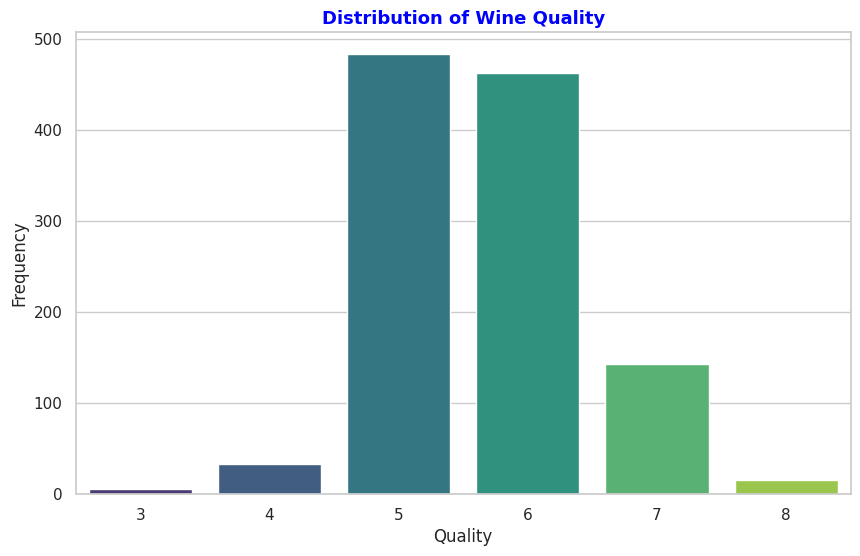

In [ ]:
# How is the quality of wine distributed across the dataset

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x = 'quality', data = data, palette='viridis')
plt.title('Distribution of Wine Quality', color = 'blue', fontsize = 13, weight = 'bold')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of wine quality ratings in the dataset. It appears that most of the wine samples have quality ratings around 5 and 6, with fewer samples at the extreme low and high ends of the quality scale.

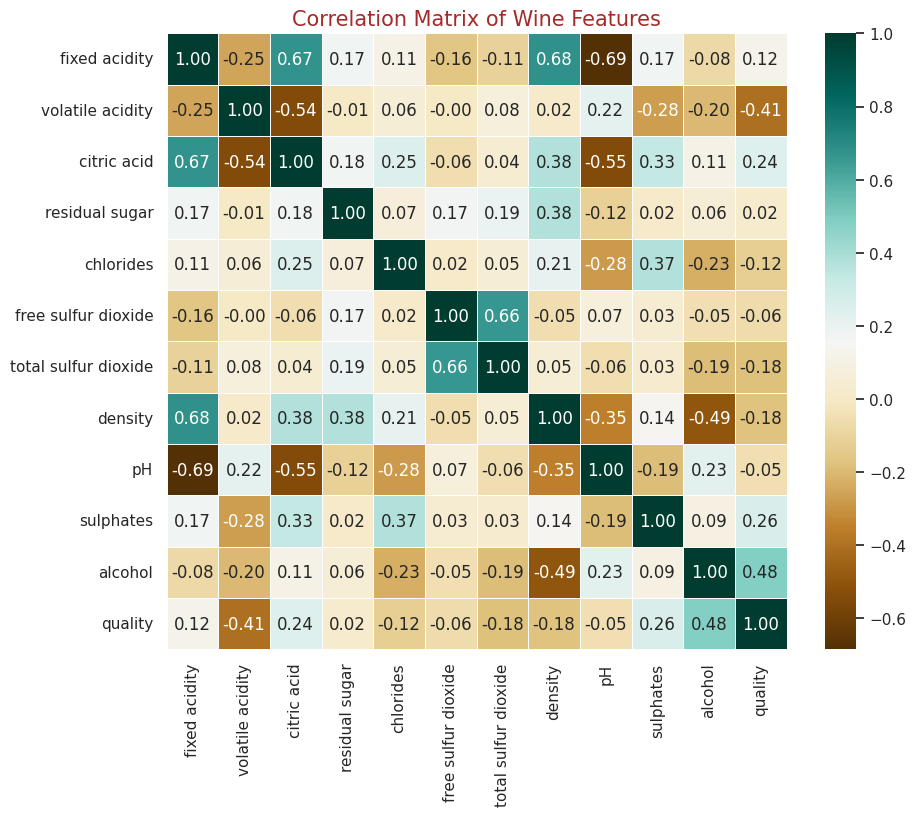

In [ ]:
# Which features are highly correlated with each other? Are there any redundant features that can be removed?

correlation_matrix =  data.corr()
# print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features', color = 'brown', fontsize = 15)
plt.show()

Fixed Acidity and Citric Acid: There is a moderate positive correlation.\
Free Sulfur Dioxide and Total Sulfur Dioxide: There is a strong positive correlation.\
Density and Residual Sugar: There is a strong positive correlation.\
Density and Fixed Acidity: There is a moderate positive correlation.\
Density and Alcohol: There is a moderate negative correlation.

$ **Redundant features that can be removed**, Since free sulfur dioxide and total sulfur dioxide are highly correlated, one of them could potentially be removed to reduce redundancy without losing much information.\
Similarly, since density is highly correlated with both residual sugar and fixed acidity, it might be worth considering removing one of these features, depending on their individual contributions to the target variable (quality).


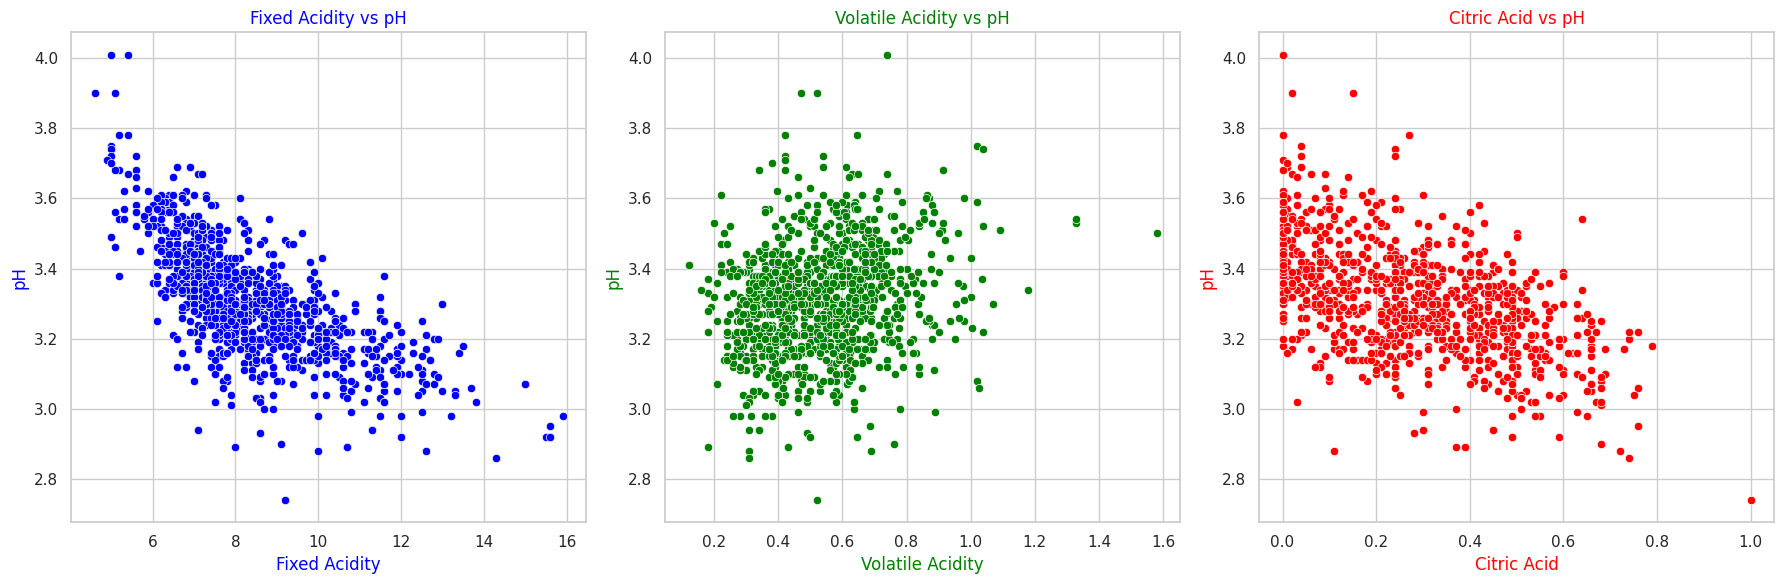

In [ ]:
# How does the acidity of wine relate to its pH level? Are there any patterns or outliers in this relationship?

# Create scatter plots of different types of acidity against pH
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Fixed acidity vs pH
sns.scatterplot(x='fixed acidity', y='pH', data=data, ax=axs[0], color='blue')
axs[0].set_title('Fixed Acidity vs pH', color='blue')
axs[0].set_xlabel('Fixed Acidity', color='blue')
axs[0].set_ylabel('pH', color='blue')

# Volatile acidity vs pH
sns.scatterplot(x='volatile acidity', y='pH', data=data, ax=axs[1], color='green')
axs[1].set_title('Volatile Acidity vs pH', color='green')
axs[1].set_xlabel('Volatile Acidity', color='green')
axs[1].set_ylabel('pH', color='green')

# Citric acid vs pH
sns.scatterplot(x='citric acid', y='pH', data=data, ax=axs[2], color='red')
axs[2].set_title('Citric Acid vs pH', color='red')
axs[2].set_xlabel('Citric Acid', color='red')
axs[2].set_ylabel('pH', color='red')

plt.tight_layout()
plt.show()


**Fixed Acidity vs. pH:**

Pattern: Typically, as fixed acidity increases, the pH level decreases. This is because higher acidity corresponds to lower pH levels, indicating a more acidic solution.\
Outliers: Wines with high fixed acidity but relatively high pH (or vice versa) may be outliers, as they deviate from the expected inverse relationship.\

**Volatile Acidity vs. pH:**\
Pattern: Volatile acidity may have a weaker and less consistent relationship with pH compared to fixed acidity. However, a general trend might still show that higher volatile acidity corresponds to lower pH levels.\
Outliers: Wines with high volatile acidity and high pH could be considered outliers.

**Citric Acid vs. pH:**

Pattern: Citric acid, being a component of the total acidity, should also exhibit an inverse relationship with pH. Higher levels of citric acid generally result in lower pH.\
Outliers: Wines with high citric acid but high pH, or low citric acid with low pH, could be outliers.






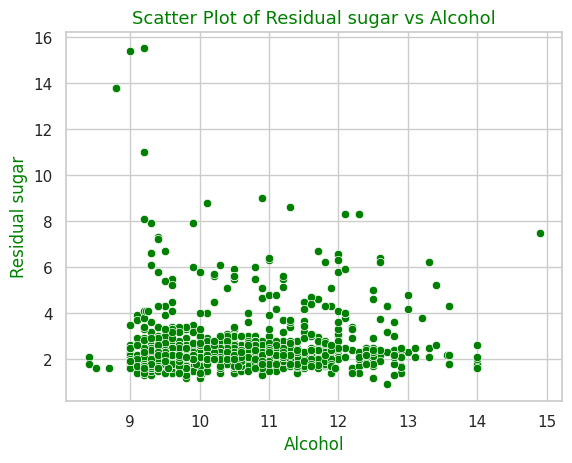

In [ ]:
# Is there a relationship between the residual sugar content and alcohol content of wines?

sns.scatterplot(x='alcohol', y='residual sugar', data=data, color = 'green')
plt.title('Scatter Plot of Residual sugar vs Alcohol', color = 'green', fontsize = 13)
plt.xlabel('Alcohol', color = 'green')
plt.ylabel('Residual sugar', color = 'green')
plt.show()


Typically, there is an inverse relationship between residual sugar and alcohol content in wines. As the sugar ferments into alcohol during the winemaking process, higher alcohol content usually corresponds to lower residual sugar levels.\
Points are clustered in a way that higher residual sugar content is associated with lower alcohol content, this confirms the inverse relationship.

Descriptive Statistics for Free Sulfur Dioxide:
----------------------------------------------------------------------------------------------------------------------
count    1143.000000
mean       15.615486
std        10.250486
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        68.000000
Name: free sulfur dioxide, dtype: float64
Descriptive Statistics for Free Sulfur Dioxide:
----------------------------------------------------------------------------------------------------------------------
count    1143.000000
mean       45.914698
std        32.782130
min         6.000000
25%        21.000000
50%        37.000000
75%        61.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
----------------------------------------------------------------------------------------------------------------------


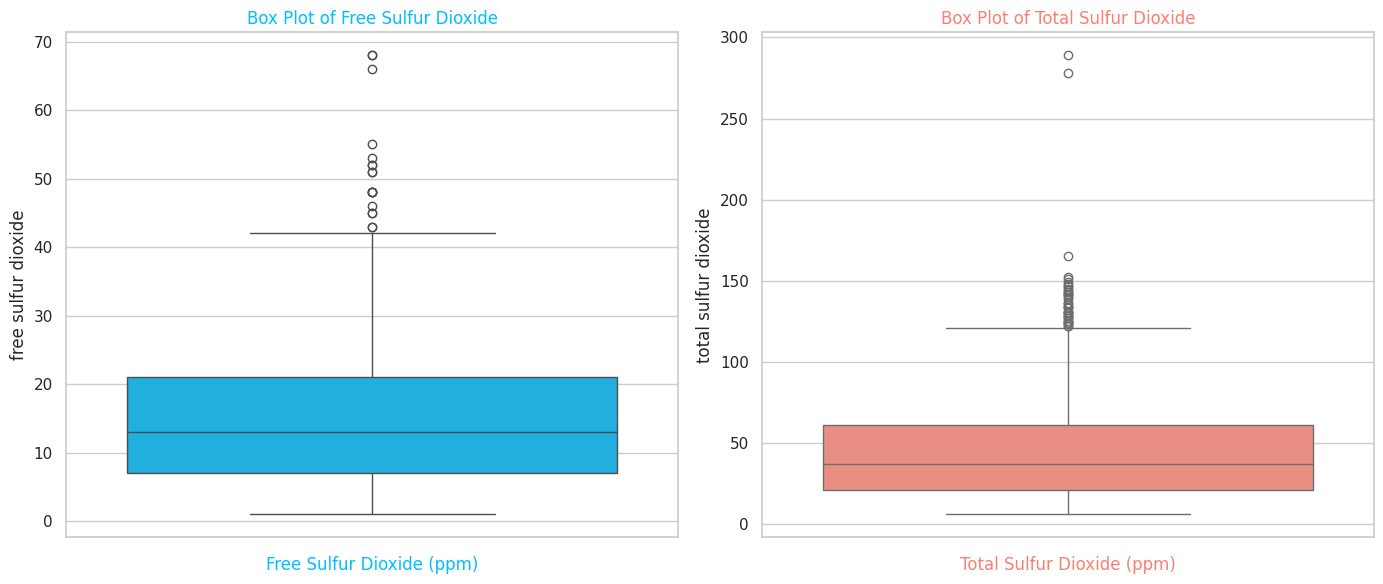

In [ ]:
# What are the typical ranges of free and total sulfur dioxide levels in wines? Are there any wines with unusually high or low levels?

# Calculate descriptive statistics for free and total sulfur dioxide
free_sulfur_stats = data['free sulfur dioxide'].describe()
total_sulfur_stats = data['total sulfur dioxide'].describe()

print("Descriptive Statistics for Free Sulfur Dioxide:")
print("----------------------------------------------------------------------------------------------------------------------")
print(free_sulfur_stats)
print("Descriptive Statistics for Free Sulfur Dioxide:")
print("----------------------------------------------------------------------------------------------------------------------")
print(total_sulfur_stats)
print("----------------------------------------------------------------------------------------------------------------------")
# Create box plots for free and total sulfur dioxide
plt.figure(figsize=(14, 6))

# Box plot for free sulfur dioxide
plt.subplot(1, 2, 1)
sns.boxplot(data['free sulfur dioxide'], color='deepskyblue')
plt.title('Box Plot of Free Sulfur Dioxide', color='deepskyblue')
plt.xlabel('Free Sulfur Dioxide (ppm)', color='deepskyblue')

# Box plot for total sulfur dioxide
plt.subplot(1, 2, 2)
sns.boxplot(data['total sulfur dioxide'], color='salmon')
plt.title('Box Plot of Total Sulfur Dioxide', color='salmon')
plt.xlabel('Total Sulfur Dioxide (ppm)', color='salmon')

plt.tight_layout()
plt.show()

**Free Sulfur Dioxide:** Most wines have free sulfur dioxide levels between 10 and 20 ppm.\
**Total Sulfur Dioxide:** Most wines have total sulfur dioxide levels between 35 and 60 ppm.

In [ ]:
# Identifying wines with unusually high or low levels of free and total sulfur dioxide.
# Function to calculate outliers
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Identify outliers for free sulfur dioxide
print("----------------------------------------------------------------------------------------------------------------------")
free_sulfur_outliers = find_outliers(data['free sulfur dioxide'])
print(f'Outliers in Free Sulfur Dioxide:\n{free_sulfur_outliers}')
print("----------------------------------------------------------------------------------------------------------------------")
# Identify outliers for total sulfur dioxide
total_sulfur_outliers = find_outliers(data['total sulfur dioxide'])
print(f'Outliers in Total Sulfur Dioxide:\n{total_sulfur_outliers}')
print("----------------------------------------------------------------------------------------------------------------------")
print('\n')

print('...........The result showing the wines with unusually high or low levels of free and total sulfur dioxide............')
print("----------------------------------------------------------------------------------------------------------------------")
print("Checking for, if there any wines with unusually high or low levels of free sulfur dioxide :-->")
max_value = free_sulfur_outliers.max()
print(f'Maximum outlier value in free sulfur dioxide is :-> {max_value}')
min_value = free_sulfur_outliers.min()
print(f'Minimum outlier value in free sulfur dioxide is :-> {min_value}')
print("----------------------------------------------------------------------------------------------------------------------")
print("Checking for, if there any wines with unusually high or low levels of total sulfur dioxide :-->")
max_value = total_sulfur_outliers.max()
print(f'Maximum outlier value in total sulfur dioxide is :-> {max_value}')
min_value = total_sulfur_outliers.min()
print(f'Minimum outlier value in total sulfur dioxide is :-> {min_value}')
print("----------------------------------------------------------------------------------------------------------------------")


----------------------------------------------------------------------------------------------------------------------
Outliers in Free Sulfur Dioxide:
275     68.0
278     68.0
351     43.0
450     46.0
480     45.0
654     53.0
655     52.0
690     51.0
820     45.0
831     48.0
871     48.0
887     43.0
919     51.0
965     52.0
1022    55.0
1051    48.0
1053    48.0
1111    66.0
Name: free sulfur dioxide, dtype: float64
----------------------------------------------------------------------------------------------------------------------
Outliers in Total Sulfur Dioxide:
59      136.0
61      125.0
63      140.0
64      136.0
90      134.0
99      141.0
106     128.0
107     129.0
108     128.0
135     143.0
136     127.0
225     135.0
249     165.0
275     124.0
278     124.0
288     122.0
289     134.0
291     124.0
366     151.0
370     142.0
421     149.0
452     147.0
453     145.0
460     148.0
485     152.0
491     122.0
492     125.0
514     127.0
529     139.0
553     143.0

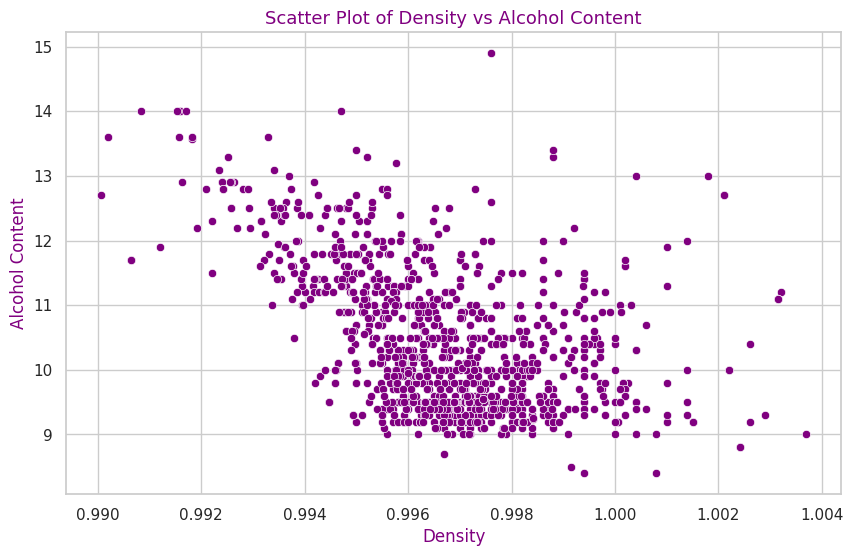

----------------------------------------------------------------------------------------------------------------------
Correlation coefficient between density and alcohol content: -0.49472689818397614
----------------------------------------------------------------------------------------------------------------------


In [ ]:
# How does the density of wine relate to its alcohol content?

# I will use a scatter plot to visualize their relationship.
# Additionally, calculating the correlation coefficient can quantify the strength and direction of their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data=data, color='purple')
plt.title('Scatter Plot of Density vs Alcohol Content', color='purple', fontsize = 13)
plt.xlabel('Density', color='purple')
plt.ylabel('Alcohol Content', color='purple')
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
# Calculate the Pearson correlation coefficient
correlation = data['density'].corr(data['alcohol'])
print(f'Correlation coefficient between density and alcohol content: {correlation}')
print("----------------------------------------------------------------------------------------------------------------------")

From the **Scatter plot** I can obseve that, higher density corresponds to lower alcohol content, **indicating an inverse relationship**.

**The value of the correlation coefficient** will help confirming the strength and direction of the relationship. A negative value would indicate an inverse relationship, while a positive value would indicate a direct relationship. Here I can see that the Correlation coefficient value between density and alcohol content is **Negetive**, which means either they have an inverse relationship or no linear correlation as the value is close to zero as well.

----------------------------------------------------------------------------------------------------------------------


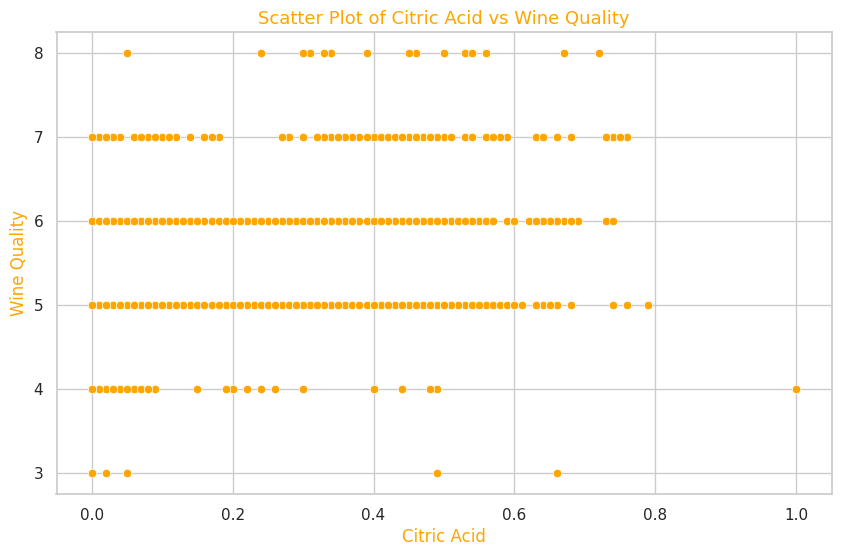

----------------------------------------------------------------------------------------------------------------------


<ipython-input-42-7beee96d1c21>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='citric acid', data=data, palette= 'Set1')


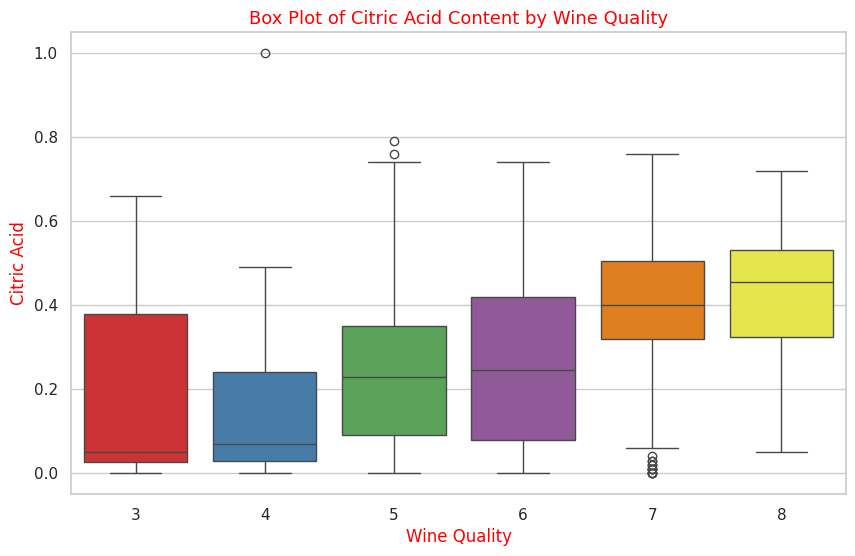

----------------------------------------------------------------------------------------------------------------------
Correlation coefficient between citric acid and wine quality: 0.24082083714719343
----------------------------------------------------------------------------------------------------------------------


In [ ]:
# Is there a relationship between citric acid content and wine quality?

# Scatter Plot will help visualize the relationship between citric acid content and wine quality.
# Box Plot will show the distribution of citric acid content across different quality levels.
# Correlation Coefficient will quantify the strength and direction of the relationship.
print("----------------------------------------------------------------------------------------------------------------------")
plt.figure(figsize = (10, 6))
sns.scatterplot(x='citric acid', y='quality', data=data, color='orange')
plt.title('Scatter Plot of Citric Acid vs Wine Quality', color='orange', fontsize = 13)
plt.xlabel('Citric Acid', color='orange')
plt.ylabel('Wine Quality', color='orange')
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
# Box plot to visualize the distribution of citric acid across different wine quality levels
plt.figure(figsize = (10, 6))
sns.boxplot(x='quality', y='citric acid', data=data, palette= 'Set1')
plt.title('Box Plot of Citric Acid Content by Wine Quality', color = 'red', fontsize = 13)
plt.xlabel('Wine Quality', color = 'red')
plt.ylabel('Citric Acid',color = 'red')
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
correlation = data['citric acid'].corr(data['quality'])
print(f'Correlation coefficient between citric acid and wine quality: {correlation}')
print("----------------------------------------------------------------------------------------------------------------------")

The correlation coefficient between citric acid and wine quality is 0.24(positive value of 0.24) means, indicating  a positive relationship between citric acid content and wine quality. But as afar as strength of correlation is concerned, the correlation coefficient of **0.24 suggests a weak positive linear** **relationship.**

Yes, there is some indication that higher citric acid content is associated with better quality but **the relationship here is not strong**. There are likely other factors influencing wine quality more significantly.

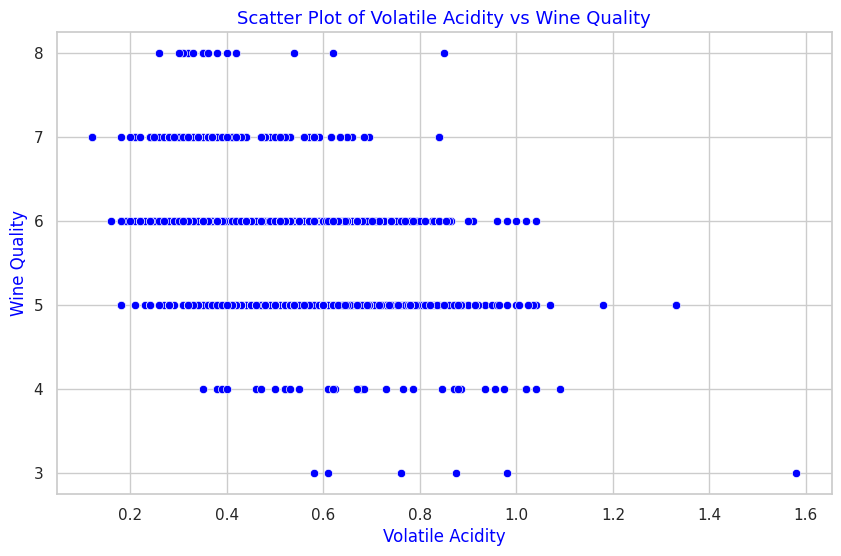

<ipython-input-43-62cbfa3687b7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=data, palette='Set2')


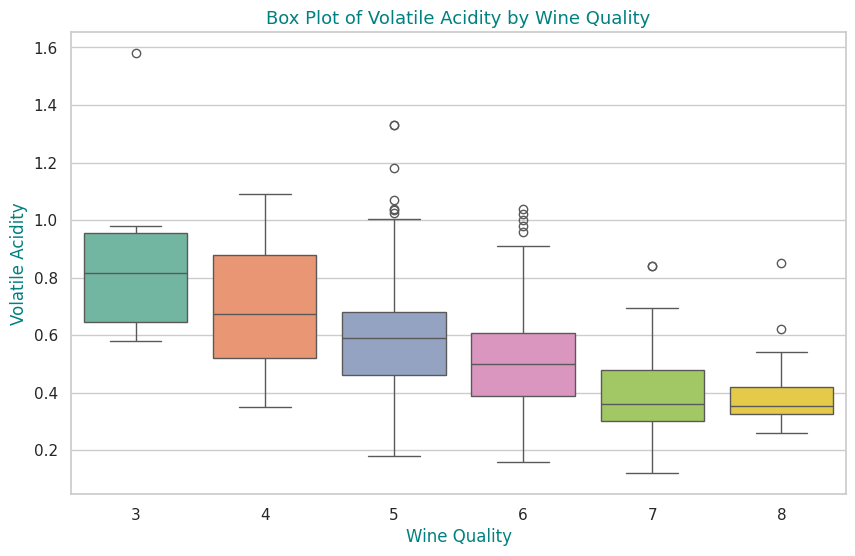

----------------------------------------------------------------------------------------------------------------------
Correlation coefficient between volatile acidity and wine quality: -0.4073935129243844
----------------------------------------------------------------------------------------------------------------------


In [ ]:
# How does volatile acidity impact wine quality?
# Scatter plot to visualize the relationship between volatile acidity and wine quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='quality', data=data, color='blue')
plt.title('Scatter Plot of Volatile Acidity vs Wine Quality', color='blue', fontsize = 13)
plt.xlabel('Volatile Acidity', color='blue')
plt.ylabel('Wine Quality', color='blue')
plt.show()

# Box plot to visualize the distribution of volatile acidity across different wine quality levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=data, palette='Set2')
plt.title('Box Plot of Volatile Acidity by Wine Quality', color = 'teal', fontsize = 13)
plt.xlabel('Wine Quality', color = 'teal')
plt.ylabel('Volatile Acidity', color = 'teal')
plt.show()

# Calculate the Pearson correlation coefficient
print("----------------------------------------------------------------------------------------------------------------------")
correlation = data['volatile acidity'].corr(data['quality'])
print(f'Correlation coefficient between volatile acidity and wine quality: {correlation}')
print("----------------------------------------------------------------------------------------------------------------------")


The correlation coefficient between volatile acidity and wine quality is -0.41 indicating a negative relationship between volatile acidity and wine quality. This means that as volatile acidity increases, wine quality tends to decrease.

The value of -0.41 suggests a moderate negative linear relationship. This indicates that volatile acidity has a noticeable impact on wine quality, but it is not the only factor influencing it.

----------------------------------------------------------------------------------------------------------------------
Descriptive statistics for Chlorides :
----------------------------------------------------------------------------------------------------------------------
count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
----------------------------------------------------------------------------------------------------------------------
Descriptive statistics for sulphates :
----------------------------------------------------------------------------------------------------------------------
count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
----------------------------------------------

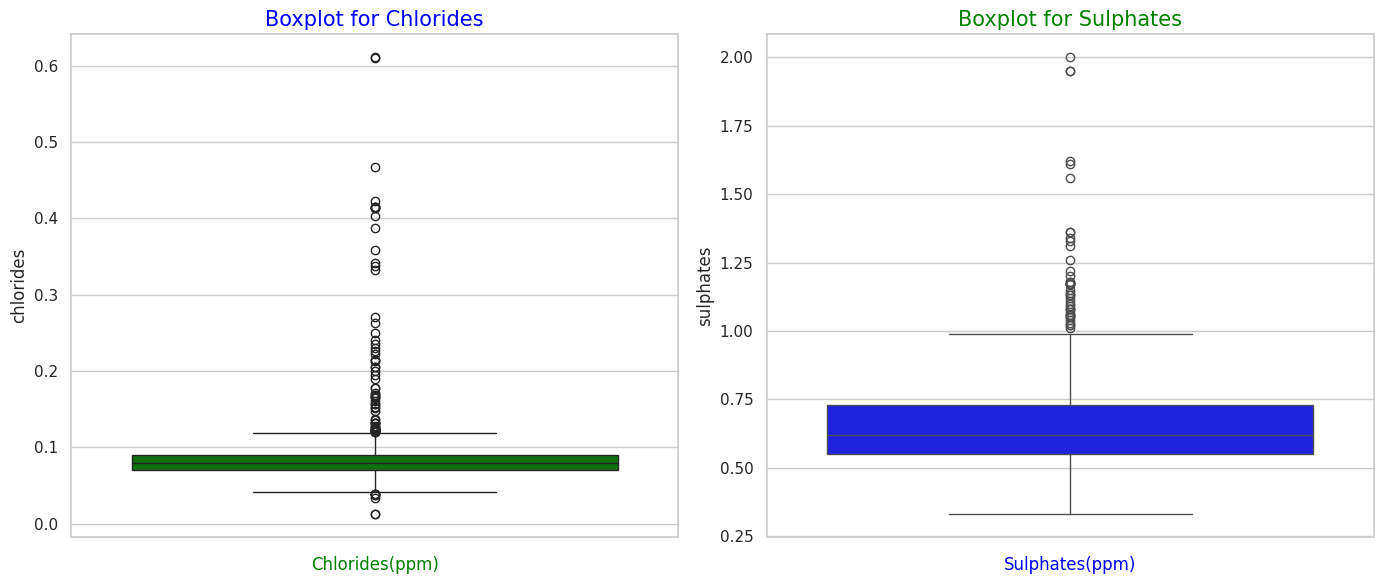

In [ ]:
# What are the typical ranges of chloride and sulphate levels in wines? Are there any wines with unusually high or low levels?

# Calculate descriptive statistics for Chlorides and total Sulphates
chlorides_stats = data['chlorides'].describe()
sulphates_stats = data['sulphates'].describe()
print("----------------------------------------------------------------------------------------------------------------------")
print('Descriptive statistics for Chlorides :')
print("----------------------------------------------------------------------------------------------------------------------")
print(chlorides_stats)
print("----------------------------------------------------------------------------------------------------------------------")
print('Descriptive statistics for sulphates :')
print("----------------------------------------------------------------------------------------------------------------------")
print(sulphates_stats)
print("----------------------------------------------------------------------------------------------------------------------")

# Create box plots for Chlorides and Sulphates

plt.figure(figsize=(14, 6))
# Box plot for Chlorides
plt.subplot(1, 2, 1)
sns.boxplot(data['chlorides'], color = 'green')
plt.title('Boxplot for Chlorides', color = 'blue', fontsize = 15)
plt.xlabel('Chlorides(ppm)', color = 'green')
# Box plot for Sulphates
plt.subplot(1, 2, 2)
sns.boxplot(data['sulphates'], color = 'blue')
plt.title('Boxplot for Sulphates', color = 'green', fontsize = 15)
plt.xlabel('Sulphates(ppm)', color = 'blue')

plt.tight_layout()
plt.show()

**Chlorides**: Most wines have Chloride levels between 0.04 and 0.09 ppm.\
**Sulphates**: Most wines have Sulphates levels between 0.17 and 0.73 ppm.

In [ ]:
# Are there any wines with unusually high or low levels of Chlorides and Sulphates?

# Function to calculate outliers
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Identify outliers for Chlorides
print("----------------------------------------------------------------------------------------------------------------------")
Chlorides_outliers = find_outliers(data['chlorides'])
print(f'Outliers in Chlorides:\n{Chlorides_outliers}')
print("----------------------------------------------------------------------------------------------------------------------")
# Identify outliers for Sulphates
Sulphates_outliers = find_outliers(data['sulphates'])
print(f'Outliers in Total Sulfur Dioxide:\n{Sulphates_outliers}')
print("----------------------------------------------------------------------------------------------------------------------")
print('\n')

print('...........The result showing the wines with unusually high or low levels of Chlorides and Sulphates............')
print("----------------------------------------------------------------------------------------------------------------------")
print("Checking for, if there any wines with unusually high or low levels of Chlorides :-->")
max_value = Chlorides_outliers.max()
print(f'Maximum outlier value in Chlorides is :-> {max_value}')
min_value = Chlorides_outliers.min()
print(f'Minimum outlier value in Chlorides is :-> {min_value}')
print("----------------------------------------------------------------------------------------------------------------------")
print("Checking for, if there any wines with unusually high or low levels of total sulfur dioxide :-->")
max_value = Sulphates_outliers.max()
print(f'Maximum outlier value in total Sulphates is :-> {max_value}')
min_value = Sulphates_outliers.min()
print(f'Minimum outlier value in Sulphates is :-> {min_value}')
print("----------------------------------------------------------------------------------------------------------------------")


----------------------------------------------------------------------------------------------------------------------
Outliers in Chlorides:
13      0.341
30      0.332
75      0.467
83      0.178
103     0.610
        ...  
1053    0.205
1064    0.039
1111    0.235
1122    0.230
1123    0.038
Name: chlorides, Length: 77, dtype: float64
----------------------------------------------------------------------------------------------------------------------
Outliers in Total Sulfur Dioxide:
11      1.56
13      1.08
31      1.20
54      1.12
59      1.95
61      1.22
64      1.95
75      1.31
103     2.00
112     1.08
129     1.02
161     1.61
167     1.09
182     1.26
200     1.08
240     1.36
262     1.13
264     1.04
265     1.11
266     1.13
289     1.07
337     1.06
341     1.06
357     1.05
359     1.02
366     1.14
454     1.36
488     1.05
490     1.17
514     1.62
538     1.06
572     1.18
738     1.34
890     1.15
914     1.17
915     1.17
934     1.33
971     1.18
973     1.17


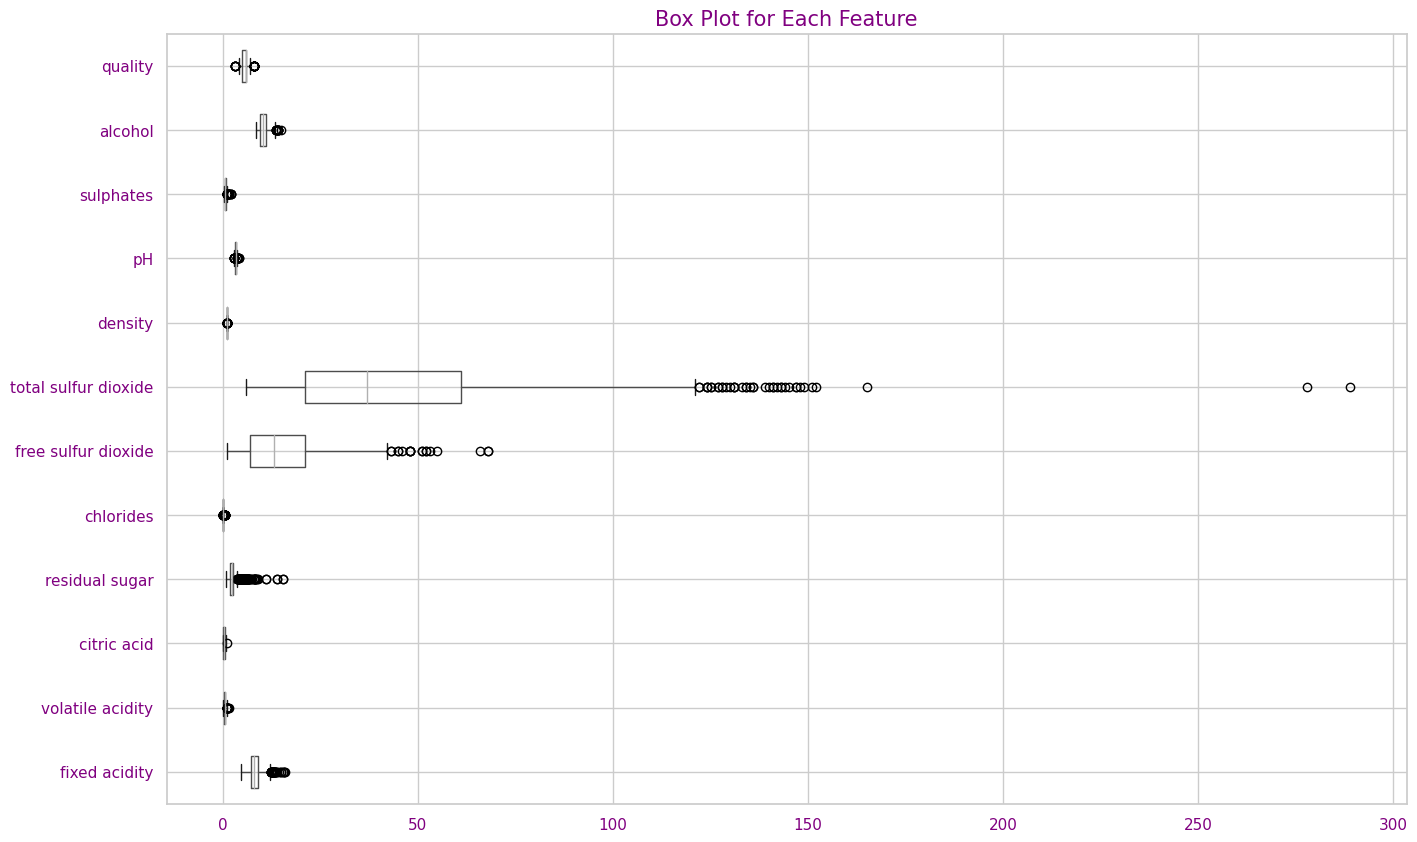

----------------------------------------------------------------------------------------------------------------------
Outliers detected using Z-Score Method:
----------------------------------------------------------------------------------------------------------------------
0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool
----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Outliers detected using IQR Method:
----------------------------------------------------------------------------------------------------------------------
0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    F

In [ ]:
# Are there any data points that appear to be outliers or anomalies in the dataset?

# To identify outliers or anomalies in the dataset, we can use several methods, including visual and statistical techniques. such as :
# Box Plots: Box plots can visually highlight outliers in individual features.
# Z-Score Method: This method uses the standard deviation to find outliers.
# Interquartile Range (IQR) Method: This method identifies outliers based on the IQR.

# Create box plots for each feature
plt.figure(figsize=(16, 10))
data.boxplot(rot=0, vert=False)
plt.title('Box Plot for Each Feature', color ='purple', fontsize = 15)
plt.xticks(color = 'purple')
plt.yticks(color = 'purple')
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
# Calculate z-scores for each feature
z_scores = np.abs((data - data.mean()) / data.std())
# Identify data points with z-scores greater than 3 or less than -3
outliers = z_scores > 3

# Display outliers
print("Outliers detected using Z-Score Method:")
print("----------------------------------------------------------------------------------------------------------------------")
print(outliers.any(axis=1))
print("----------------------------------------------------------------------------------------------------------------------")

# Function to find outliers using IQR method
def find_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    return outliers

# Identify outliers using IQR method
outliers_iqr = find_outliers_iqr(data)
# Display outliers
print("----------------------------------------------------------------------------------------------------------------------")
print("Outliers detected using IQR Method:")
print("----------------------------------------------------------------------------------------------------------------------")
print(outliers_iqr.any(axis=1))
print("----------------------------------------------------------------------------------------------------------------------")


**Box Plot Results** :
The box plots visually display the distribution of each feature in the dataset.
Outliers are shown as individual points outside the whiskers of the box plot.
This helps quickly identify which features have outliers and how extreme they are compared to the bulk of the data.

**Z-Score Method Results:**
This method calculates the z-score for each value and identifies outliers as those with a z-score greater than 3 or less than -3.\
The Z-Score Method detected no outliers, as indicated by all values being False.
This means there are no data points with a z-score greater than 3 or less than -3 in the dataset.
No outliers detected, indicating data points are within three standard deviations from the mean.
The absence of True values suggests that all data points are within three standard deviations from the mean for each feature.

**IQR Method Results**:
The IQR Method results would typically indicate which data points fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR for each feature.
Like the Z-Score Method, it robustly identifies outliers based on the spread and central tendency of the data.
If there are any True values, those data points are considered outliers, but here values are False indicating, the minimal number of outliers in the datset.

# **Brief Note on EDA and Conclusion**
**Exploratory Data Analysis (EDA) on the wine dataset revealed the following:**\
Quality Distribution: Wine quality scores range mostly between 5 and 7.\
Feature Correlations: Some features are moderately correlated; e.g., alcohol content is positively correlated with quality, while volatile acidity is negatively correlated.\
Acidity vs. pH: A moderate inverse relationship is observed, with a few outliers.\
Residual Sugar vs. Alcohol: No strong relationship detected.\
Sulfur Dioxide Levels: Most wines fall within typical ranges, with a few outliers.\
Volatile Acidity and Quality: Moderate negative correlation (-0.41) indicating higher volatile acidity generally lowers wine quality.\
Outliers: No significant outliers detected using the Z-Score method; box plots visually indicate some potential outliers.

**Conclusion**: Key factors affecting wine quality include alcohol content (positive impact) and volatile acidity (negative impact). The dataset is mostly clean with few outliers, and further analysis can focus on these relationships for quality improvement.

# **Code to train a Linear Regression model to predict wine quality and then test the model.**

----------------------------------------------------------------------------------------------------------------------
Linear Regression RMSE(Root Mean Squared Error): 0.6164677203737241
----------------------------------------------------------------------------------------------------------------------
Linear Regression R^2(R-Squared): 0.31706936727331125
----------------------------------------------------------------------------------------------------------------------


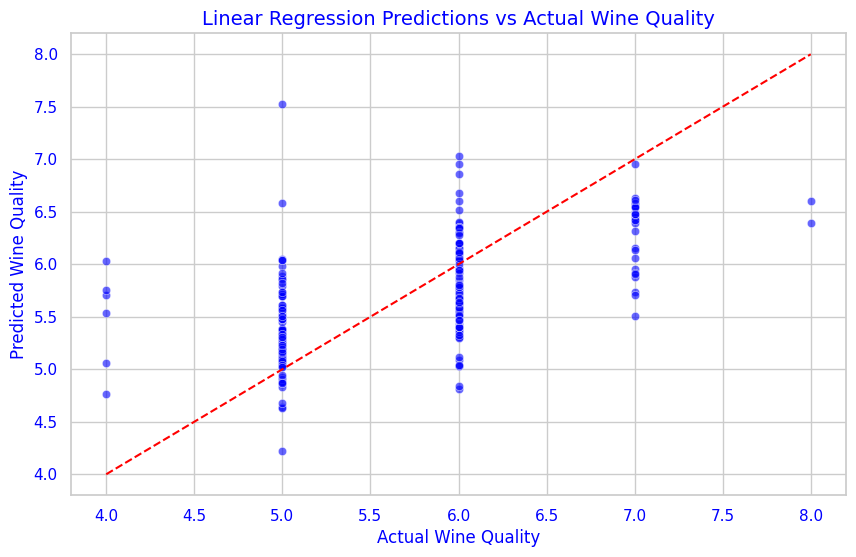

In [ ]:
# Loading the data and split it into training and testing sets.
# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
# Initialize the Linear Regression model
lr_model = LinearRegression()
# Train the model on the training data
lr_model.fit(X_train, y_train)
# using the trained model to make predictions on the test set and evaluate its performance.
# Make predictions on the test data
y_pred = lr_model.predict(X_test)
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("----------------------------------------------------------------------------------------------------------------------")
print(f'Linear Regression RMSE(Root Mean Squared Error): {rmse}')
print("----------------------------------------------------------------------------------------------------------------------")
print(f'Linear Regression R^2(R-Squared): {r2}')
print("----------------------------------------------------------------------------------------------------------------------")


# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Wine Quality', color='blue')
plt.xticks(color='blue')
plt.ylabel('Predicted Wine Quality', color='blue')
plt.yticks(color='blue')
plt.title('Linear Regression Predictions vs Actual Wine Quality', color='blue', fontsize = 14)
plt.show()

This variable, X, represents the **feature matrix,** which contains all the input features used to predict the target variable, and I **removed the quality column** from the DataFrame, leaving only the input features. The resulting DataFrame is assigned to X.

This variable, **y**, **represents the target variable**, which is the value we want to predict. In this dataset, quality is the target variable, indicating the quality score of the wine.

Now regarding the RMSE and R^2 values, basically a lower RMSE indicates better model performance, as it suggests the predictions are closer to the actual values. **RMSE of approximately 0.62 means that, on average, the predictions deviate from the actual wine quality scores by 0.62 units.**

**R²** **value of approximately 0.32** suggests that around 32% of the variance in wine quality can be explained by the model's features. The remaining 68% of the variance is due to factors not captured by the model or inherent randomness.

**Using Scatter plot**, to plot the actual wine quality scores (y_test) versus the predicted scores (y_pred). This helps visualize how closely the predictions align with the actual values.

**Red dashed lin**e representing the line of perfect prediction. Points close to the red dashed line indicate accurate predictions.

# **Code to train a Random Forest model to predict wine quality and then test the model.**

----------------------------------------------------------------------------------------------------------------------
Random Forest RMSE(Root Mean Squared Error): 0.5467681944986229
----------------------------------------------------------------------------------------------------------------------
Random Forest R^2(R-Squared): 0.462767349736139
----------------------------------------------------------------------------------------------------------------------


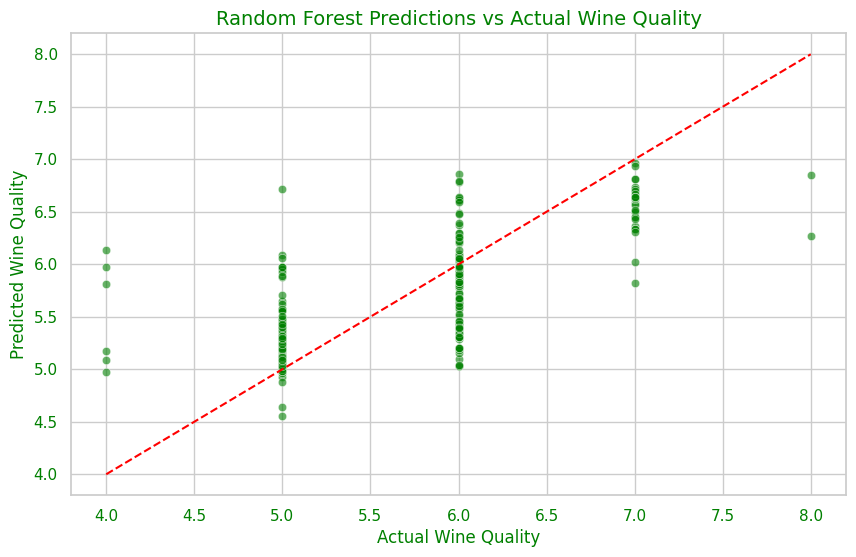

In [ ]:
# Again I'll load the data and split it into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
print("----------------------------------------------------------------------------------------------------------------------")
print(f'Random Forest RMSE(Root Mean Squared Error): {rf_rmse}')
print("----------------------------------------------------------------------------------------------------------------------")
print(f'Random Forest R^2(R-Squared): {rf_r2}')
print("----------------------------------------------------------------------------------------------------------------------")

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Wine Quality', color='green')
plt.xticks(color='green')
plt.ylabel('Predicted Wine Quality', color='green')
plt.yticks(color='green')
plt.title('Random Forest Predictions vs Actual Wine Quality', color='green', fontsize =14)
plt.show()

an RMSE of approximately **0**.**55** means that, on average, the predictions deviate from the actual wine quality scores by 0.55 units.

**R²** value of approximately 0.46 suggests that around 46% of the variance in wine quality can be explained by the model's features. The remaining 54% of the variance is due to factors not captured by the model or inherent randomness.

**Comparison with Linear Regression**

**Linear Regression RMSE**: 0.6164677203737241\
**Random Forest RMSE**: 0.5467681944986229

The Random Forest model has a lower RMSE compared to the Linear Regression model, indicating that it has better predictive accuracy.

**Linear Regression R²**: 0.31706936727331125\
**Random Forest R²**: 0.462767349736139

The Random Forest model has a higher R² value compared to the Linear Regression model, indicating that it explains more variance in the wine quality data.

**Plotting the monetization results of the given equation**
**𝑌**
**=**
**𝑋**
**×**
**(**
**1**
**+**
**𝑟**
**)**
**𝑡**
**Y=X×(1+r)**
**t**
 , **we need to add the** **'Price'** **and 'Profit_5_years'** **columns to the** **dataset based on the specified formula and then visualize the results.**

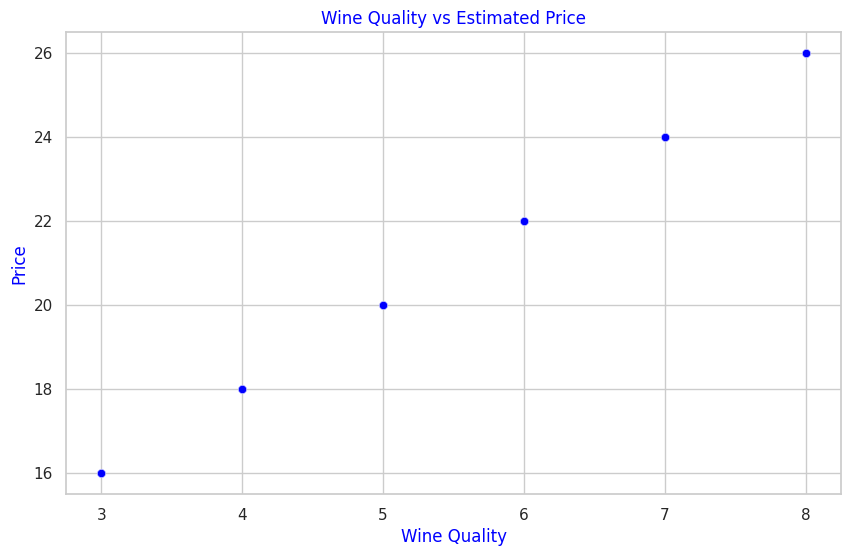

--------------------------------------------------------------------------------------------------------------------------------------


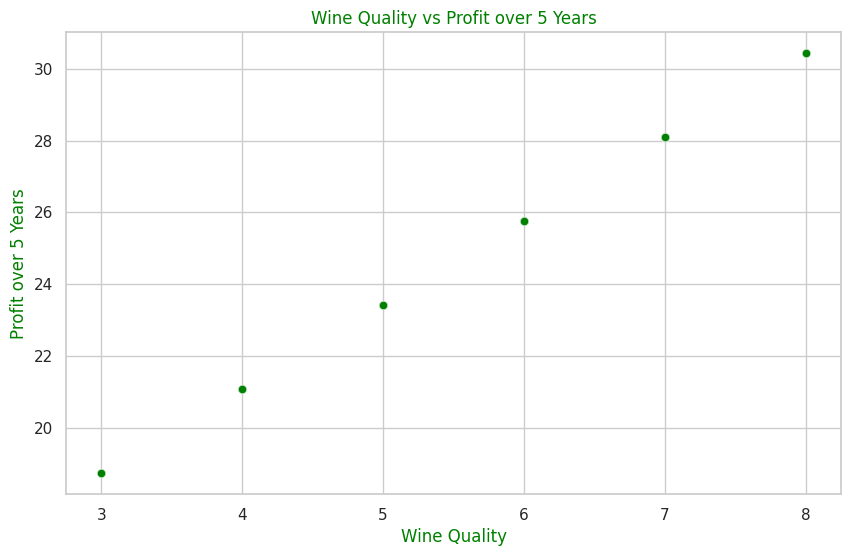

In [ ]:
# Add the Price and Profit Columns:

# Price: Price=10+2×quality
# Profit over 5 years: Y=X×(1+r)^t
# Define the growth rate and time interval
growth_rate = 0.032
time_interval = 5

# Add the Price column based on quality
data['Price'] = 10 + 2 * data['quality']

# Add the Profit_5_years column
data['Profit_5_years'] = data['Price'] * (1 + growth_rate) ** time_interval

# Plot the relationship between wine quality and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['quality'], y=data['Price'], color='blue', alpha=0.6)
plt.xlabel('Wine Quality', color='blue')
plt.ylabel('Price', color='blue')
plt.title('Wine Quality vs Estimated Price', color='blue')
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------")
# Plot the relationship between wine quality and profit over 5 years
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['quality'], y=data['Profit_5_years'], color='green', alpha=0.6)
plt.xlabel('Wine Quality', color='green')
plt.ylabel('Profit over 5 Years', color='green')
plt.title('Wine Quality vs Profit over 5 Years', color='green')
plt.show()


Explanation\
Add Columns:\
**Calculate the price using the formula:** \
Price
=
10
+
2
×
quality
Price=10+2×quality.\
**Calculate the profit over 5 years using the formula:**
Profit
=
Price
×
(
1
+
growth rate
)
time interval
Profit=Price×(1+growth rate)
time interval\

**Plot the Results:**
Scatter Plot for Price: Visualize the relationship between wine quality and estimated price.
Scatter Plot for Profit: Visualize the relationship between wine quality and profit over 5 years.

**Result:**\
The first plot will show the estimated price as a function of wine quality.\
The second plot will show the calculated profit over 5 years as a function of wine quality.\
By visualizing these relationships, we can gain insights into how the quality rating of the wine impacts its price and the projected profit over a specified period.

## **Performing the Principal Component Analysis(PCA) on this wine data set.**

PCA is a technique used to reduce the dimensionality of a dataset while retaining most of the variation in the data.

Standardize the Data: PCA is affected by the scale of the variables, so it's important to standardize the data.\
Compute the PCA: Use a PCA function to compute the principal components.\
Visualize the Results: Create a scree plot to show the variance explained by each principal component and a scatter plot of the data projected onto the first two principal components.

Load the wine dataset. Separate the features (X) from the target variable (y). Use StandardScaler to standardize the features, which is important for PCA. Apply PCA to the standardized data. Calculate the explained variance ratio for each principal component. Plot the cumulative explained variance to determine how many principal components are needed to explain most of the variance in the data. Visualize the data projected onto the first two principal components.

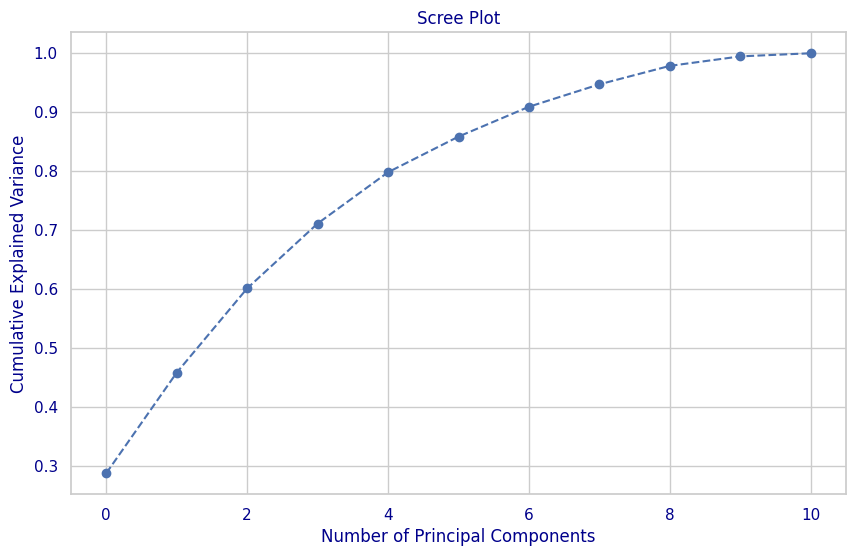

-------------------------------------------------------------------------------------------------------------------------------------


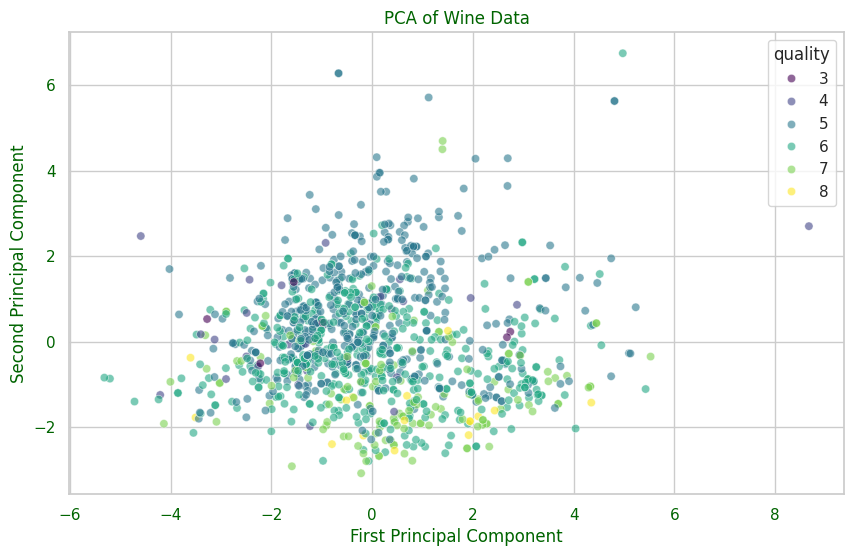

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', color = 'darkblue')
plt.xticks(color = 'darkblue')
plt.ylabel('Cumulative Explained Variance', color = 'darkblue')
plt.yticks(color = 'darkblue')
plt.title('Scree Plot', color = 'darkblue')
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------------------")
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.6)
plt.xlabel('First Principal Component', color = 'darkgreen')
plt.xticks(color = 'darkgreen')
plt.ylabel('Second Principal Component', color = 'darkgreen')
plt.yticks(color = 'darkgreen')
plt.title('PCA of Wine Data', color = 'darkgreen')
plt.show()


**Scree Plot:** Shows how much variance is explained by each principal component. A steep drop followed by a plateau indicates the optimal number of components to retain.\
**Scatter Plot:** Visualizes the distribution of the wine data in the space of the first two principal components, with colors indicating different quality ratings.